# Homework 9: Classification via k-nearest neighbors
# 60 pts, Due Tuesday June 8 at 11:59pm 

# **Helpful Resources:**# 

- [Getting help on a Jupyter Notebook](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/02.07-Getting-Help-in-a-Jupyter-Notebook/)

- [Python Examples](https://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Python_101.ipynb): A reference for distinct Python commands (worth returning to throughout this course)

- [Inferential Thinking: Classification](https://inferentialthinking.com/chapters/17/Classification.html): Good conceptual overview


### Question 0: Collaborating with yourself. 
This week I'd like you to collaborate with yourself by working in parallel on your own computer (let me know if you have any issues with running Python, Jupyter Notebook, or Git) and on the class server. You can connect these two sources through a GitHub remote repository. I'll look at your work on the class server but also at your GitHub repository:

What is your Github handle?


In [1]:
symmetricK

NameError: name 'symmetricK' is not defined

### Question 1: Visualizing the data
<img src ='iris-dataset.png' width="500px" /><br>

This week we will perform automated classification (in this case species identification) using the famous [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), collected by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher), a remarkable and statistician and geneticist, largely responsible for development of permutation tests.

`iris.csv` contains 4 measurements (*sepal width*, *sepal length*, *petal width*, and *petal length*) from each of 150 flowers belonging to three species: *Iris setosa*, *Iris versicolor*, and *Iris virginica*. To visualize the raw data, first import the data from the csv file and make six scatter plots, each of which plots unique pairs of parameters for all 150 flowers. For organization purposes, make subplots on the same figure. The first row should be three scatter plots which involve sepal width (on horizontal axis in each subplot). The next row should be the other the three parameter combinations. Plot each species of iris as a distinct color. Your plot should look something like this.<br>
<img src ='demo.svg' width="900px" /><br><br>
Make the code that produces this plot a function, `make_scatter` as we will modify it later on. For now, ignore the optional arguments `example` and `k` in function definition. We will deal with them later. You can call function without those arguments as in the function call `make_scatter(df)` I provide below.

*Hint*: [pyplot.subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) is useful for making subplots. For instance, `ax=plt.subplots(2,3)` creates six subplots with two rows and three columns.<br>
`ax[0,0].scatter(x,y)` would make scatter plot on first of these subplots.<br>
`fig.tight_layout()` pushes subplots closer together on page.<br>
To make figure readable, adjust figure size, `fig.set_size_inches` and marker size of scatter.

### Answer 1:

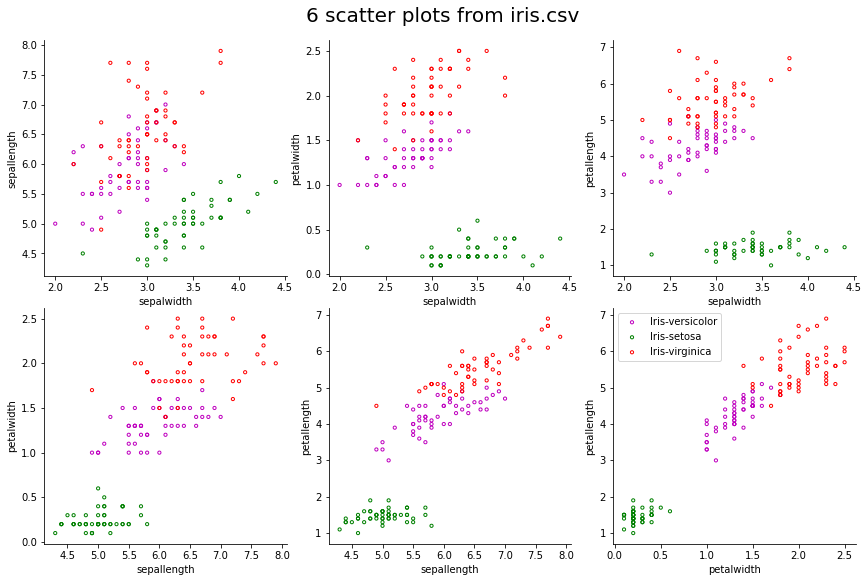

In [8]:
#Code for Answer 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('iris.csv')
df.columns


def make_scatter(df,example=None,k=None):
    '''
    Input: df, iris Pandas data frame
    Optional input: example,data frame to plot as point on scatter plots
    Optional input: k, number of closest points to mark
    Makes six scatter plots for each unique pair of parameters
    '''
    rows=2
    columns=3
    counts=1
    classes=['Iris-versicolor','Iris-setosa','Iris-virginica']
    colors=['m','g','r']   
    fig, axs=plt.subplots(rows,columns)
    fig.suptitle("6 scatter plots from iris.csv",fontsize=20) 
    fig.set_size_inches(12,8)
    fig.tight_layout()
        
    for row in np.arange(rows):
        for column in np.arange(columns):
            axs[row,column].spines['top'].set_visible(False)
            axs[row,column].spines['right'].set_visible(False)
            if(counts==1):
                x=df.sepalwidth
                y=df.sepallength
                axs[row,column].set_xlabel('sepalwidth',fontsize=10)
                axs[row,column].set_ylabel('sepallength',fontsize=10)
            elif(counts==2):
                x=df.sepalwidth
                y=df.petalwidth
                axs[row,column].set_xlabel('sepalwidth',fontsize=10)
                axs[row,column].set_ylabel('petalwidth',fontsize=10)
            elif(counts==3):
                x=df.sepalwidth
                y=df.petallength
                axs[row,column].set_xlabel('sepalwidth',fontsize=10)
                axs[row,column].set_ylabel('petallength',fontsize=10)
            elif(counts==4):
                x=df.sepallength
                y=df.petalwidth
                axs[row,column].set_xlabel('sepallength',fontsize=10)
                axs[row,column].set_ylabel('petalwidth',fontsize=10)
            elif(counts==5):
                x=df.sepallength
                y=df.petallength
                axs[row,column].set_xlabel('sepallength',fontsize=10)
                axs[row,column].set_ylabel('petallength',fontsize=10)
            else:
                x=df.petalwidth
                y=df.petallength
                axs[row,column].set_xlabel('petalwidth',fontsize=10)
                axs[row,column].set_ylabel('petallength',fontsize=10)
            counts+=1
            for index in np.arange(len(classes)):
                cr_class=classes[index]
                axs[row,column].scatter(x[df['class']==cr_class],y[df['class']==cr_class],s=10,facecolors='None',edgecolors=colors[index], label=cr_class)                    
                if(counts==7):
                    axs[row,column].legend(loc='upper left',fontsize=10)

make_scatter(df)

### Question 2: Adding an example row as a point on your scatter plot.

- Write code below to choose an example row randomly from the dataframe and save that single row as `example_df`, a dataframe
- The `make_scatter` function above takes an optional argument `example` <br>

- Put a conditional statement in your function so that if an example is passed to it, it plots the example as a cyan point on each of the subplots. This conditional statement can be written like this <br>
`if example is not None:`



### Answer 2

,sepallength,sepalwidth,petallength,petalwidth,class
94,5.6,2.7,4.2,1.3,Iris-versicolor


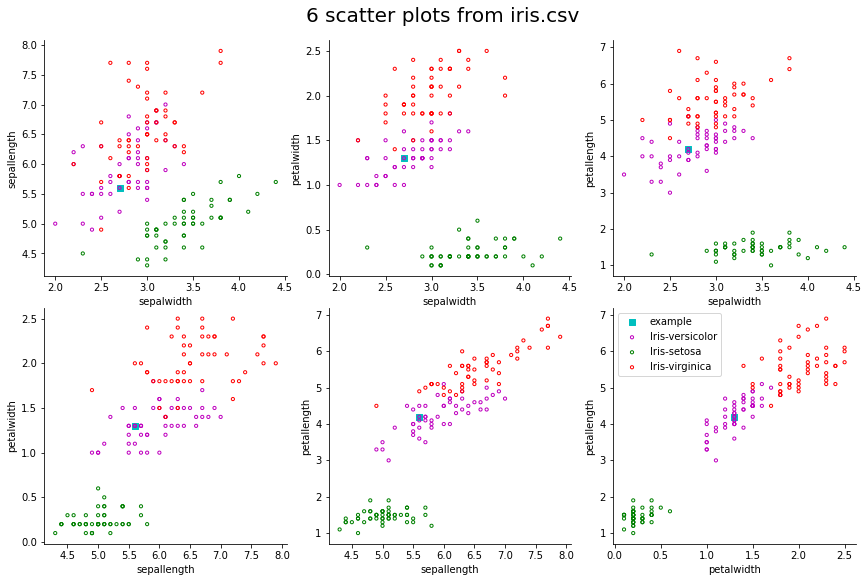

In [9]:
#Answer 2 below
#Extract example_df, modify make_scatter to plot an example_df
example_df=df.sample(n=1)

def make_scatter(df,example,k=None):
    '''
    Input: df, iris Pandas data frame
    Optional input: example,data frame to plot as point on scatter plots
    Optional input: k, number of closest points to mark
    Makes six scatter plots for each unique pair of parameters
    '''
    rows=2
    columns=3
    counts=1
    classes=['Iris-versicolor','Iris-setosa','Iris-virginica']
    colors=['m','g','r']   
    fig, axs=plt.subplots(rows,columns)
    fig.suptitle("6 scatter plots from iris.csv",fontsize=20) 
    fig.set_size_inches(12,8)
    fig.tight_layout()
        
    for row in np.arange(rows):
        for column in np.arange(columns):
            axs[row,column].spines['top'].set_visible(False)
            axs[row,column].spines['right'].set_visible(False)
            if(counts==1):
                x=df.sepalwidth
                y=df.sepallength
                axs[row,column].set_xlabel('sepalwidth',fontsize=10)
                axs[row,column].set_ylabel('sepallength',fontsize=10)
            elif(counts==2):
                x=df.sepalwidth
                y=df.petalwidth
                axs[row,column].set_xlabel('sepalwidth',fontsize=10)
                axs[row,column].set_ylabel('petalwidth',fontsize=10)
            elif(counts==3):
                x=df.sepalwidth
                y=df.petallength
                axs[row,column].set_xlabel('sepalwidth',fontsize=10)
                axs[row,column].set_ylabel('petallength',fontsize=10)
            elif(counts==4):
                x=df.sepallength
                y=df.petalwidth
                axs[row,column].set_xlabel('sepallength',fontsize=10)
                axs[row,column].set_ylabel('petalwidth',fontsize=10)
            elif(counts==5):
                x=df.sepallength
                y=df.petallength
                axs[row,column].set_xlabel('sepallength',fontsize=10)
                axs[row,column].set_ylabel('petallength',fontsize=10)
            else:
                x=df.petalwidth
                y=df.petallength
                axs[row,column].set_xlabel('petalwidth',fontsize=10)
                axs[row,column].set_ylabel('petallength',fontsize=10)
            counts+=1
            if example is not None:
                    axs[row,column].scatter([example[x.name]],[example[y.name]],s=30,color='c',marker='s',label="example")                
            for index in np.arange(len(classes)):
                cr_class=classes[index]
                axs[row,column].scatter(x[df['class']==cr_class],y[df['class']==cr_class],s=10,facecolors='None',edgecolors=colors[index], label=cr_class)
                if(counts==7):
                    axs[row,column].legend(loc='upper left',fontsize=10)
                    
make_scatter(df,example_df)
example_df

### Question 3: Calculating distances

To implement the K-nearest neighbor algorithm for species identification, we need to calculate distances between individual points in the multiparameter space defined by the four flower measurements. Operationally, this means calculating distances between parameters in distinct rows in a dataframe

In the `knn_fxns.py` file,  write the following functions:<br><br>
`row_distance` : Returns the Euclidean distance between two input rows (type Pandas series or array), extracted from a Pandas dataframe. Calls row_distance<br><br>
`calc_distance_to_all_rows` : Computes distance between every row in input dataframe (Pandas dataframe) and example row (Pandas series or array type) Returns dataframe with column added to the input dataframe indicating distances to example.<br><br>
`find_k_closest`: Finds the k closest neighbors to example, excluding the example itself. Returns a dataframe in same format as input df but with k rows and sorted by distance to example column.  **NOTE:** IF there is a tie for kth closest, choose the final k to include via random choice.

### Answer 3 


In [23]:
#Answer 3 here
import knn_fxns as knn

def turn_into_row(example_df):
    drop_df=example_df.drop(['class'],axis=1)
    return drop_df.iloc[0,:]

example_row=turn_into_row(example_df)

knn.row_distance(example_row,example_row)
dist_df=knn.calc_distance_to_all_rows(df,example_row)
closest_df=knn.find_k_closest(df,example_row,5)
closest_df

,sepallength,sepalwidth,petallength,petalwidth,class,distance_to_ex
94,5.6,2.7,4.2,1.3,Iris-versicolor,0.000000
99,5.7,2.8,4.1,1.3,Iris-versicolor,0.173205
96,5.7,2.9,4.2,1.3,Iris-versicolor,0.223607
90,5.5,2.6,4.4,1.2,Iris-versicolor,0.264575
89,5.5,2.5,4.0,1.3,Iris-versicolor,0.300000


In [21]:
#if the content of knn_fxns.py is changed, need to reload it into Python workspace
import importlib
importlib.reload(knn)

<module 'knn_fxns' from '/home/horikkei/hw/hw09/knn_fxns.py'>

### Question 4 
Modify scatter plot again to plot the k nearest neighbors to your example . Use the optional argument to make_scatter `k`. The function should `plot_k_closest` in each of 6 plots - with an open black circle. Below do this for k=3 and k=7. <br>
Here is an example for k=5.<br>
<img src ='demo_closest.svg' width="900px" /><br><br>
<br>
Note that there are apparently only 4 points plotted in example above though plot represents 5. Why is this? If you feel motivated, as a bonus, you can modify opacity of your black circles to better indicate overlapping scatter points. Why in some of the plots do the points calculated as closest not appear to be closest?

In [ ]:
#Answer 4 Code
make_scatter(df,example=example_df,k=3)
make_scatter(df,example=example_df,k=7)

### Answer 4 text<br><br>




## Question 5. Classification
Write a function specified in `knn_fxns.py` called `classify`, which returns the majority class from the k nearest neighbors of example. It will call `find_k_closest`. Call function below. Do results correspond to plots you made above?


In [ ]:
print(knn.classify(df,example_row,3))
print(knn.classify(df,example_row,7))


#### Answer 5 text<br>

### Question 6: Evaluating accuracy of classifier with training and test sets
To test performance of classifier with 150 total data points, we will divide data set into three random groups (Group A, B, and C) of 50 points.
Write a function in `knn_fxn.py` called `evaluate_accuracy` that evaluates the accuracy of your classifer, when provided with a training set and a test set. The accuracy of classifier is the fraction of test set correctly classified using class labels from the training set.

Do this for k=5 for three scenarios, where Group A is the test set and combined Groups B and C are training set, where B is the test set, and where C is the test set. Write code below that calls `evaluate_accuracy` function and prints the three `k=5` accuracy results, which should be greater than 80%.

**Bonus diversion:** Can you identify and plot the cases on your scatter plot where the classifier misclassified?  What do those cases look like? Are the mistakes understandable?





### Question 7: Varying k to optimize the classifier.
Evaluate classifier on your three random test groups for k=1, 3, 5, 7, 9, 11.

Make a scatter plot, which plots `accuracy` on vertical axis, `k` on horizontal axis and the 18 accuracy results, 3 for each k. Plot a line that connects the mean for each k.  Based on these findings, which value of k would you use for classification?



In [ ]:
#Answer 7 code

#### Answer 7 text answer
<br><br>

## Last, important questions
Congratulations on finishing your last problem set, and the course, and academic year!
The very last questions I expect you to answer for the course are in the student evaluation, accessible here (https://beav.es/Student-Learning-Survey), which will provide me and the BDS program important information for planning future versions of the course. Please let me know if you encounter any issues completing the survey.